In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("fitbit.csv")
df['bed time'] = df['bed time'] + ":00"
df['wake up'] = df['wake up'] + ":00"
df['bed_time_numric'] = pd.to_timedelta(df['bed time']).dt.total_seconds() / 60
df['wake_up_numric'] = pd.to_timedelta(df['wake up']).dt.total_seconds() / 60
df['bed time'] = pd.to_datetime(df['Date'] + ' ' + df['bed time'])
df['wake up'] = pd.to_datetime(df['Date'] + ' ' + df['wake up'])
df['Date'] = pd.to_datetime(df['Date'])
df['sleep duration'] = df['wake up'] - df['bed time']
df['sleep duration'] = df['sleep duration'].astype(str)
df['sleep duration'] = df['sleep duration'].apply(lambda x: x[-8:])
df['sleep duration'] = pd.to_timedelta(df['sleep duration']).dt.total_seconds() / 60
df['REM'] = df['REM']*60 + df['Unnamed: 6']
df['Light'] = df['Light']*60 + df['Unnamed: 8']
df['Deep'] = df['Deep']*60 + df['Unnamed: 10']
df['sleep duration(not awake)'] = df['REM'] + df['Light'] + df['Deep']
df = df.drop(columns=['Unnamed: 6','Unnamed: 8','Unnamed: 10'])
df

,Date,Stress Score,Sleep Score,bed time,wake up,REM,Light,Deep,segmentation,resting_heart_rate,bed_time_numric,wake_up_numric,sleep duration,sleep duration(not awake)
0,2023-01-01,NaN,83.0,2023-01-01 02:49:00,2023-01-01 12:11:00,78.0,325.0,71.0,1.0,69.0,169.0,731.0,562.0,474.0
1,2023-01-02,NaN,85.0,2023-01-02 02:39:00,2023-01-02 11:52:00,73.0,335.0,73.0,1.0,71.0,159.0,712.0,553.0,481.0
2,2023-01-03,NaN,78.0,2023-01-03 00:52:00,2023-01-03 07:16:00,50.0,228.0,44.0,1.0,69.0,52.0,436.0,384.0,322.0
3,2023-01-04,NaN,77.0,2023-01-04 01:03:00,2023-01-04 07:20:00,64.0,216.0,44.0,1.0,68.0,63.0,440.0,377.0,324.0
4,2023-01-05,NaN,76.0,2023-01-05 00:19:00,2023-01-05 07:25:00,42.0,276.0,43.0,1.0,66.0,19.0,445.0,426.0,361.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,75.0,67.0,2023-12-27 04:01:00,2023-12-27 07:43:00,28.0,98.0,65.0,1.0,65.0,241.0,463.0,222.0,191.0
361,2023-12-28,70.0,71.0,2023-12-28 00:58:00,2023-12-28 07:28:00,60.0,222.0,44.0,2.0,64.0,58.0,448.0,390.0,326.0
362,2023-12-29,73.0,71.0,2023-12-29 02:38:00,2023-12-29 07:58:00,48.0,169.0,54.0,2.0,64.0,158.0,478.0,320.0,271.0
363,2023-12-30,NaN,89.0,2023-12-30 04:39:00,2023-12-30 17:31:00,173.0,384.0,116.0,1.0,64.0,279.0,1051.0,772.0,673.0


In [3]:
# 定義移動平均窗口大小
window_size_7 = 7
window_size_30 = 30
window_size_120 = 120

# 計算移動平均值
df['Moving_Average_7(Stress)'] = df['Stress Score'].rolling(window=window_size_7, min_periods=1).mean()
df['Moving_Average_30(Stress)'] = df['Stress Score'].rolling(window=window_size_30, min_periods=1).mean()
df['Moving_Average_120(Stress)'] = df['Stress Score'].rolling(window=window_size_120, min_periods=1).mean()

df

,Date,Stress Score,Sleep Score,bed time,wake up,REM,Light,Deep,segmentation,resting_heart_rate,bed_time_numric,wake_up_numric,sleep duration,sleep duration(not awake),Moving_Average_7(Stress),Moving_Average_30(Stress),Moving_Average_120(Stress)
0,2023-01-01,NaN,83.0,2023-01-01 02:49:00,2023-01-01 12:11:00,78.0,325.0,71.0,1.0,69.0,169.0,731.0,562.0,474.0,NaN,NaN,NaN
1,2023-01-02,NaN,85.0,2023-01-02 02:39:00,2023-01-02 11:52:00,73.0,335.0,73.0,1.0,71.0,159.0,712.0,553.0,481.0,NaN,NaN,NaN
2,2023-01-03,NaN,78.0,2023-01-03 00:52:00,2023-01-03 07:16:00,50.0,228.0,44.0,1.0,69.0,52.0,436.0,384.0,322.0,NaN,NaN,NaN
3,2023-01-04,NaN,77.0,2023-01-04 01:03:00,2023-01-04 07:20:00,64.0,216.0,44.0,1.0,68.0,63.0,440.0,377.0,324.0,NaN,NaN,NaN
4,2023-01-05,NaN,76.0,2023-01-05 00:19:00,2023-01-05 07:25:00,42.0,276.0,43.0,1.0,66.0,19.0,445.0,426.0,361.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,75.0,67.0,2023-12-27 04:01:00,2023-12-27 07:43:00,28.0,98.0,65.0,1.0,65.0,241.0,463.0,222.0,191.0,72.857143,71.923077,72.854167
361,2023-12-28,70.0,71.0,2023-12-28 00:58:00,2023-12-28 07:28:00,60.0,222.0,44.0,2.0,64.0,58.0,448.0,390.0,326.0,72.714286,71.851852,72.822917
362,2023-12-29,73.0,71.0,2023-12-29 02:38:00,2023-12-29 07:58:00,48.0,169.0,54.0,2.0,64.0,158.0,478.0,320.0,271.0,73.000000,71.666667,72.854167
363,2023-12-30,NaN,89.0,2023-12-30 04:39:00,2023-12-30 17:31:00,173.0,384.0,116.0,1.0,64.0,279.0,1051.0,772.0,673.0,73.833333,71.692308,72.884211


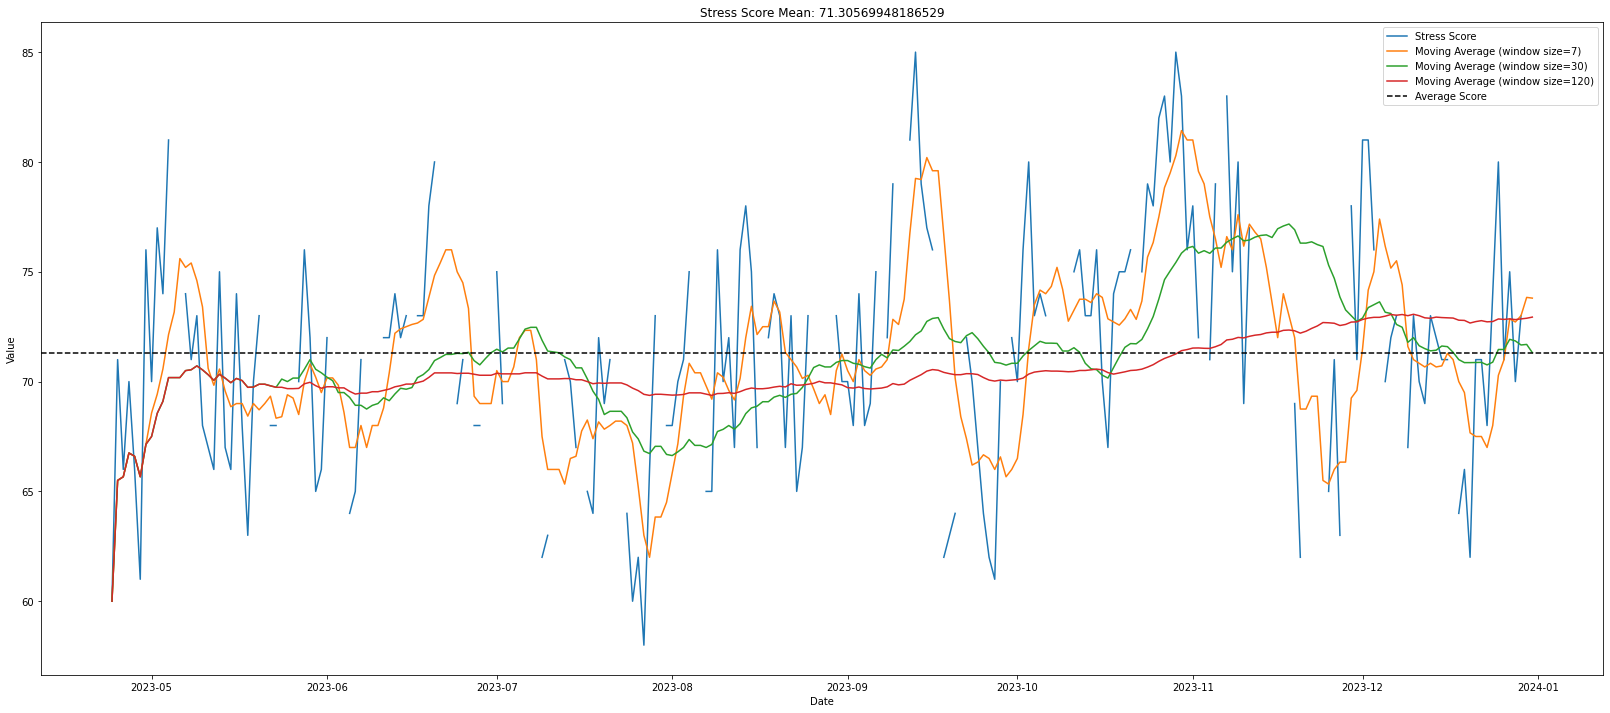

In [4]:
# 設置圖形大小
plt.figure(figsize=(28, 12))

# 繪製折線圖
plt.plot(df['Date'], df['Stress Score'], label='Stress Score')
plt.plot(df['Date'], df['Moving_Average_7(Stress)'], label=f'Moving Average (window size={window_size_7})')
plt.plot(df['Date'], df['Moving_Average_30(Stress)'], label=f'Moving Average (window size={window_size_30})')
plt.plot(df['Date'], df['Moving_Average_120(Stress)'], label=f'Moving Average (window size={window_size_120})')

# 繪製平均線
plt.axhline(df['Stress Score'].mean(), color='black', linestyle='--', label='Average Score')

# 設置標題和軸標籤
plt.title('Stress Score Mean: ' + str(df['Stress Score'].mean()))
plt.xlabel('Date')
plt.ylabel('Value')

# 添加圖例
plt.legend()

In [5]:
# 定義移動平均窗口大小
window_size_7 = 7
window_size_30 = 30
window_size_120 = 120

# 計算移動平均值
df['Moving_Average_7(Sleep)'] = df['Sleep Score'].rolling(window=window_size_7, min_periods=1).mean()
df['Moving_Average_30(Sleep)'] = df['Sleep Score'].rolling(window=window_size_30, min_periods=1).mean()
df['Moving_Average_120(Sleep)'] = df['Sleep Score'].rolling(window=window_size_120, min_periods=1).mean()

df

,Date,Stress Score,Sleep Score,bed time,wake up,REM,Light,Deep,segmentation,resting_heart_rate,bed_time_numric,wake_up_numric,sleep duration,sleep duration(not awake),Moving_Average_7(Stress),Moving_Average_30(Stress),Moving_Average_120(Stress),Moving_Average_7(Sleep),Moving_Average_30(Sleep),Moving_Average_120(Sleep)
0,2023-01-01,NaN,83.0,2023-01-01 02:49:00,2023-01-01 12:11:00,78.0,325.0,71.0,1.0,69.0,169.0,731.0,562.0,474.0,NaN,NaN,NaN,83.000000,83.000000,83.000000
1,2023-01-02,NaN,85.0,2023-01-02 02:39:00,2023-01-02 11:52:00,73.0,335.0,73.0,1.0,71.0,159.0,712.0,553.0,481.0,NaN,NaN,NaN,84.000000,84.000000,84.000000
2,2023-01-03,NaN,78.0,2023-01-03 00:52:00,2023-01-03 07:16:00,50.0,228.0,44.0,1.0,69.0,52.0,436.0,384.0,322.0,NaN,NaN,NaN,82.000000,82.000000,82.000000
3,2023-01-04,NaN,77.0,2023-01-04 01:03:00,2023-01-04 07:20:00,64.0,216.0,44.0,1.0,68.0,63.0,440.0,377.0,324.0,NaN,NaN,NaN,80.750000,80.750000,80.750000
4,2023-01-05,NaN,76.0,2023-01-05 00:19:00,2023-01-05 07:25:00,42.0,276.0,43.0,1.0,66.0,19.0,445.0,426.0,361.0,NaN,NaN,NaN,79.800000,79.800000,79.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,75.0,67.0,2023-12-27 04:01:00,2023-12-27 07:43:00,28.0,98.0,65.0,1.0,65.0,241.0,463.0,222.0,191.0,72.857143,71.923077,72.854167,74.857143,79.833333,76.009259
361,2023-12-28,70.0,71.0,2023-12-28 00:58:00,2023-12-28 07:28:00,60.0,222.0,44.0,2.0,64.0,58.0,448.0,390.0,326.0,72.714286,71.851852,72.822917,73.714286,79.333333,75.944444
362,2023-12-29,73.0,71.0,2023-12-29 02:38:00,2023-12-29 07:58:00,48.0,169.0,54.0,2.0,64.0,158.0,478.0,320.0,271.0,73.000000,71.666667,72.854167,73.428571,78.766667,75.990741
363,2023-12-30,NaN,89.0,2023-12-30 04:39:00,2023-12-30 17:31:00,173.0,384.0,116.0,1.0,64.0,279.0,1051.0,772.0,673.0,73.833333,71.692308,72.884211,74.428571,78.933333,76.074074


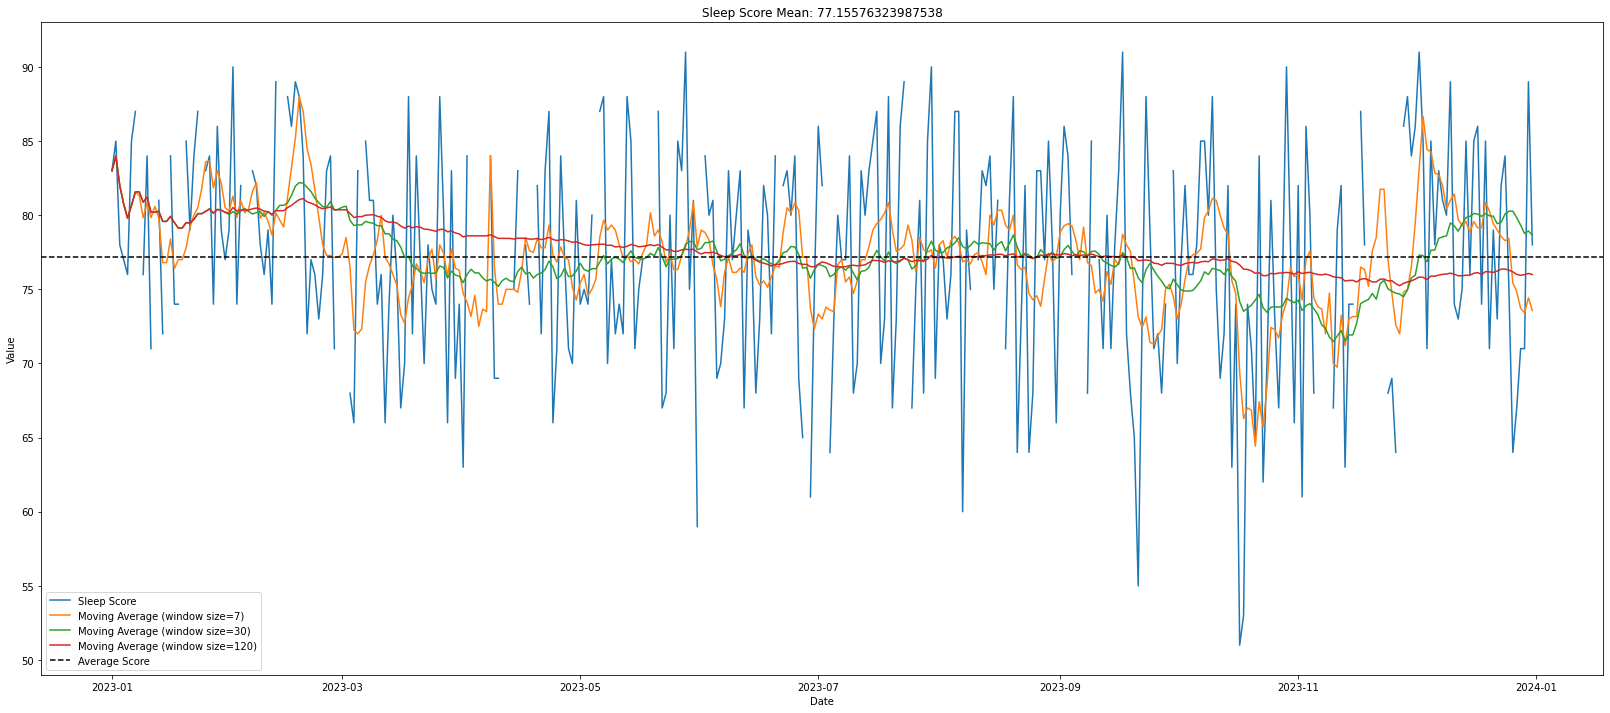

In [6]:
# 設置圖形大小
plt.figure(figsize=(28, 12))

# 繪製折線圖
plt.plot(df['Date'], df['Sleep Score'], label='Sleep Score')
plt.plot(df['Date'], df['Moving_Average_7(Sleep)'], label=f'Moving Average (window size={window_size_7})')
plt.plot(df['Date'], df['Moving_Average_30(Sleep)'], label=f'Moving Average (window size={window_size_30})')
plt.plot(df['Date'], df['Moving_Average_120(Sleep)'], label=f'Moving Average (window size={window_size_120})')

# 繪製平均線
plt.axhline(df['Sleep Score'].mean(), color='black', linestyle='--', label='Average Score')

# 設置標題和軸標籤
plt.title('Sleep Score Mean: ' + str(df['Sleep Score'].mean()))
plt.xlabel('Date')
plt.ylabel('Value')

# 添加圖例
plt.legend()

## 愈關注的指標

y1 : 'Stress Score'</br>
y2 : 'Sleep Score'</br>
y3 : 'resting_heart_rate'</br>
y4 : 'REM''</br>
y5 : 'Deep''</br>

## features X

* bed time
* wake up
* segmentation
* sleep duration

In [7]:
corr = df[['Stress Score','Sleep Score','resting_heart_rate','REM','Light','Deep','bed_time_numric','wake_up_numric','segmentation','sleep duration','sleep duration(not awake)']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

,Stress Score,Sleep Score,resting_heart_rate,REM,Light,Deep,bed_time_numric,wake_up_numric,segmentation,sleep duration,sleep duration(not awake)
Stress Score,1.0000,0.2189,-0.1149,0.1954,-0.0624,0.0820,-0.1636,0.2300,0.0012,-0.0155,0.0220
Sleep Score,0.2189,1.0000,0.0573,0.7630,0.6786,0.6172,0.0982,0.2988,-0.3039,0.7262,0.7937
resting_heart_rate,-0.1149,0.0573,1.0000,-0.0869,-0.0034,-0.0502,-0.1510,-0.0201,-0.2130,-0.0326,-0.0354
REM,0.1954,0.7630,-0.0869,1.0000,0.5762,0.5155,0.0716,0.3429,-0.2834,0.7150,0.7595
Light,-0.0624,0.6786,-0.0034,0.5762,1.0000,0.5345,0.1848,0.4323,-0.3418,0.9295,0.9473
Deep,0.0820,0.6172,-0.0502,0.5155,0.5345,1.0000,0.1087,0.3266,-0.1696,0.6989,0.7219
bed_time_numric,-0.1636,0.0982,-0.1510,0.0716,0.1848,0.1087,1.0000,-0.2346,0.0428,0.2005,0.1687
wake_up_numric,0.2300,0.2988,-0.0201,0.3429,0.4323,0.3266,-0.2346,1.0000,-0.1875,0.4541,0.4547
segmentation,0.0012,-0.3039,-0.2130,-0.2834,-0.3418,-0.1696,0.0428,-0.1875,1.0000,-0.2993,-0.3422
sleep duration,-0.0155,0.7262,-0.0326,0.7150,0.9295,0.6989,0.2005,0.4541,-0.2993,1.0000,0.9715


In [8]:
X = df[['bed_time_numric','wake_up_numric','segmentation','sleep duration','sleep duration(not awake)']]
X = X.fillna(X.median())
y = df['Sleep Score']
y = y.fillna(y.median())

In [9]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(fit_intercept=False)
regressor.fit(X, y)

regressor.coef_ 

array([ 2.30615540e-03,  2.83838200e-02,  1.26974120e+01, -5.87713752e-02,
        1.86339880e-01])